In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoderSequenceZ
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC_Numpyro import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose, result_dict_to_latent_variable_convert_phi_to_beta_flatten, just_return_results_flatten_beta

In [5]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Numpyro_Versions.LDA_NumPyro import make_lda_program, make_lda_program_batched

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [6]:
N = 25
P = 10
K = 3
BATCH_SIZE = 8
N_EPOCHS = 1
N_SAMPLES_PER_EPOCH = BATCH_SIZE*4
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [7]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n_docs", curriculum.constant_scheduler(N)),
    ("n_words", curriculum.constant_scheduler(P)),
    ("n_topics", curriculum.constant_scheduler(K)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("alpha_dir", curriculum.constant_scheduler(0.1)),
    ("beta_dir", curriculum.constant_scheduler(0.8)),
    ("doc_len_max", curriculum.constant_scheduler(100)),
    ("doc_len_mean", curriculum.constant_scheduler(10.0))
])
#curriculum.plot_all_schedules()

In [8]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_lda_program_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [9]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= 32,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 64,
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 128 and 16 respectively


In [10]:
sample_batch = next(iter(epoch_loader[0][0]))

In [11]:
for key, value in sample_batch.items():
    print(key, value.shape)

theta torch.Size([32, 25, 3])
phi torch.Size([32, 3, 10])
x torch.Size([32, 25, 10])
beta torch.Size([32, 3, 10])
time torch.Size([32])
base_sample_beta torch.Size([32, 3, 10])


####################################################################################################
Epoch 0


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:41<00:00, 20.75s/it]


{'X': {'mean': tensor(315.4869), 'variance': tensor(79618.2656), 'min': tensor(0.), 'max': tensor(1531.), 'mean_mean': tensor([277.1769, 338.5650, 362.8575, 290.2500, 330.3525, 308.6275, 366.6425,
        286.2075, 287.6725, 306.5175]), 'variance_mean': tensor([44568.8359, 60323.6367, 76952.3125, 51799.9297, 61626.9648, 61099.9609,
        64550.3125, 19327.2500, 37444.9180, 43445.2031]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.1000), 'variance': tensor(0.0098), 'min': tensor(0.0002), 'max': tensor(0.4780), 'mean_mean': tensor([0.0889, 0.1042, 0.1206, 0.0872, 0.1041, 0.1001, 0.1138, 0.0912, 0.0938,
        0.0962]), 'variance_mean': tensor([0.0094, 0.0119, 0.0172, 0.0097, 0.0113, 0.0123, 0.0125, 0.0042, 0.0077,
        0.0084]), 'min_mean': None, 'max_mean': None}}
Statistics for theta:
Mean: tensor([[0.3122, 0.3430, 0.3448],
        [0.4113, 0.3287, 0.2600],
        [0.1860, 0.2768, 0.5372],
        [0.4434, 0.2166, 0.3400],
        [0.2920, 0.3679, 0.3401],
   

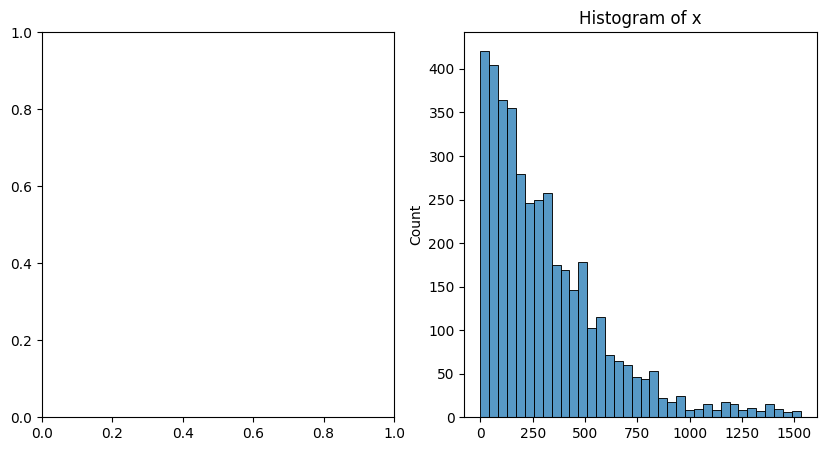

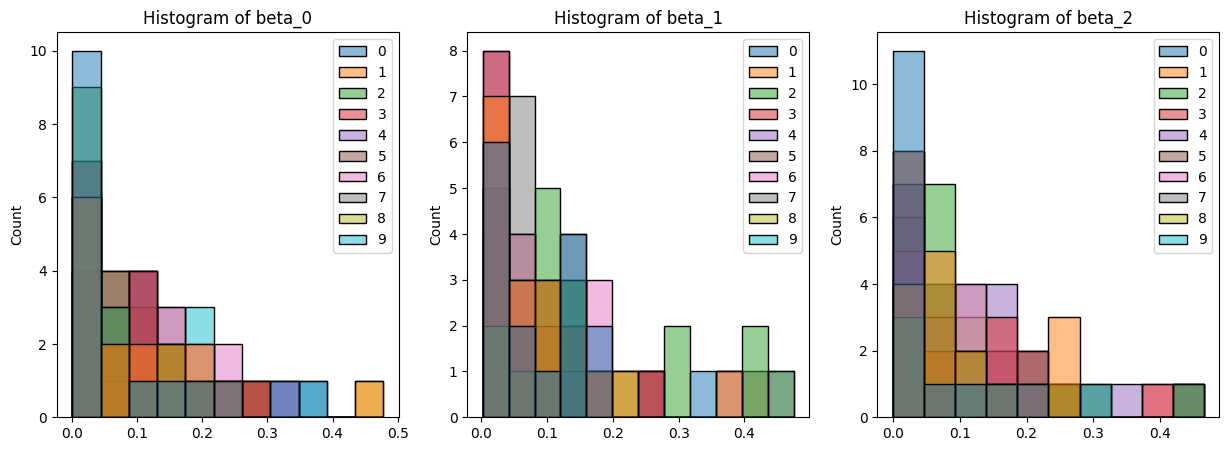

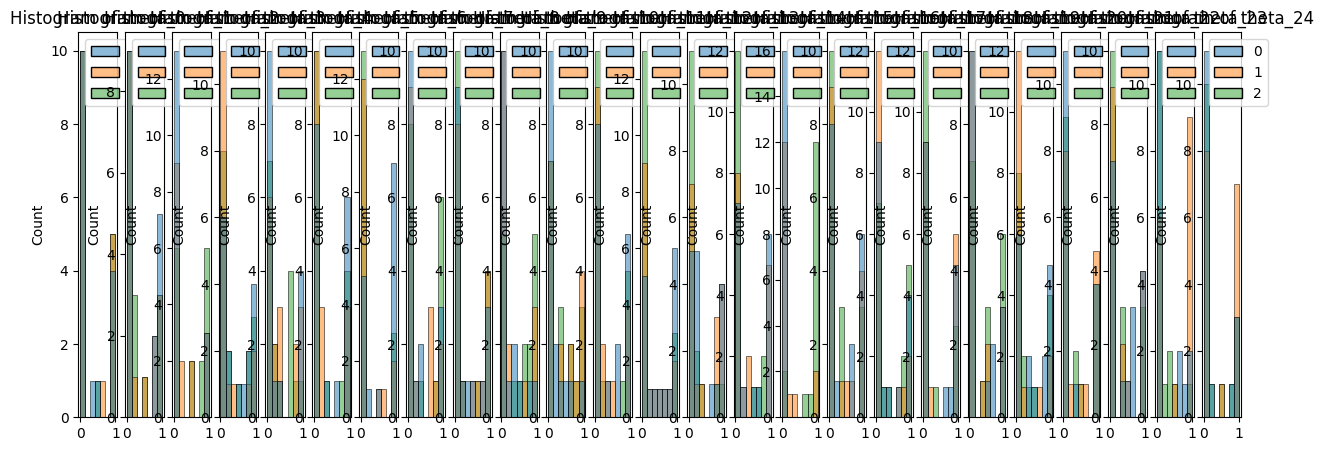

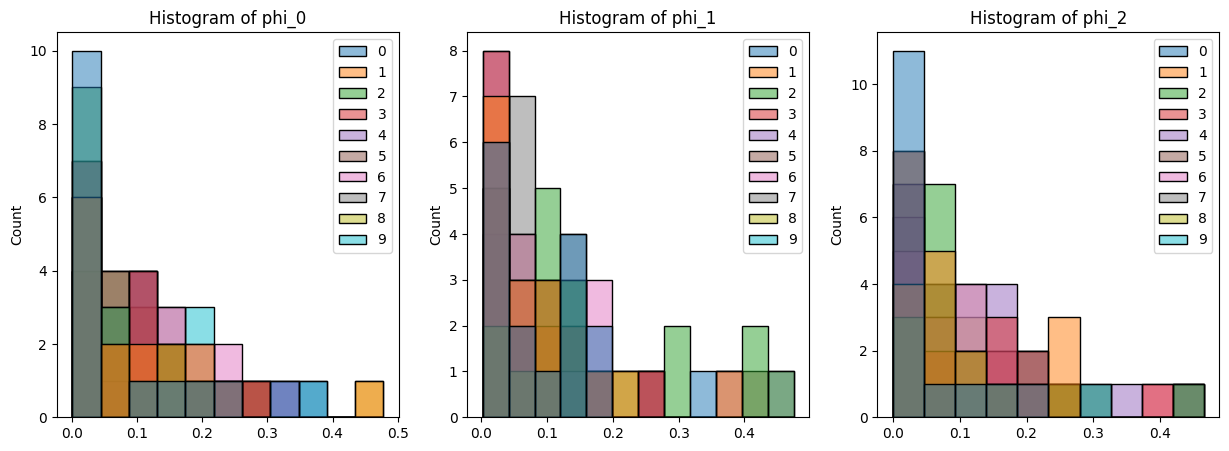

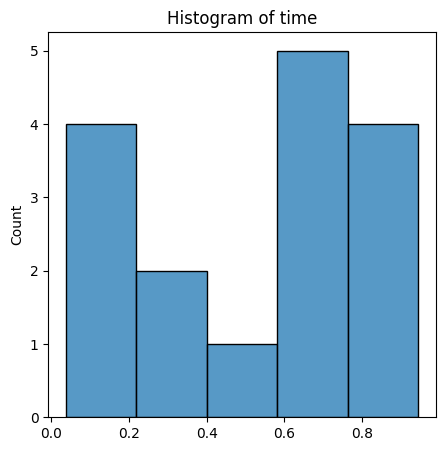

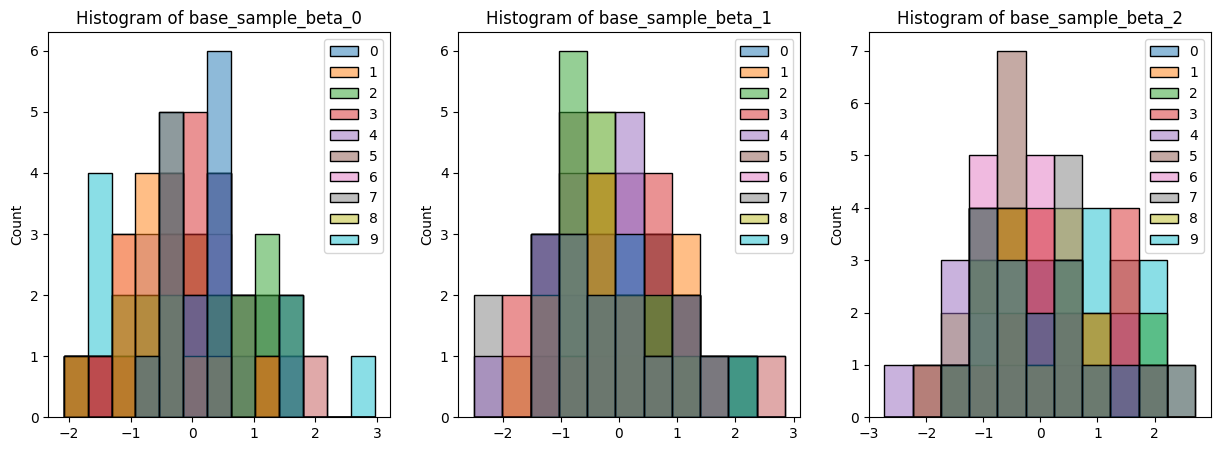

####################################################################################################
Epoch 0


100%|██████████| 2/2 [00:29<00:00, 14.76s/it]


{'X': {'mean': tensor(312.9816), 'variance': tensor(77053.6250), 'min': tensor(0.), 'max': tensor(1591.), 'mean_mean': tensor([324.2509, 238.5850, 314.5825, 297.4900, 367.1400, 270.8225, 344.4475,
        362.6225, 313.9550, 295.9200]), 'variance_mean': tensor([34790.9805, 26440.4082, 41479.7891, 56374.9219, 49176.0078, 43834.9922,
        58771.5977, 65290.9297, 32490.6191, 36260.5469]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.1000), 'variance': tensor(0.0093), 'min': tensor(9.7141e-05), 'max': tensor(0.5064), 'mean_mean': tensor([0.1045, 0.0769, 0.1039, 0.0978, 0.1144, 0.0874, 0.1107, 0.1137, 0.0968,
        0.0937]), 'variance_mean': tensor([0.0073, 0.0051, 0.0084, 0.0112, 0.0095, 0.0096, 0.0122, 0.0134, 0.0078,
        0.0073]), 'min_mean': None, 'max_mean': None}}
Statistics for theta:
Mean: tensor([[0.2582, 0.4457, 0.2960],
        [0.3740, 0.4641, 0.1619],
        [0.1277, 0.4794, 0.3929],
        [0.2697, 0.3814, 0.3488],
        [0.2615, 0.4717, 0.2668],

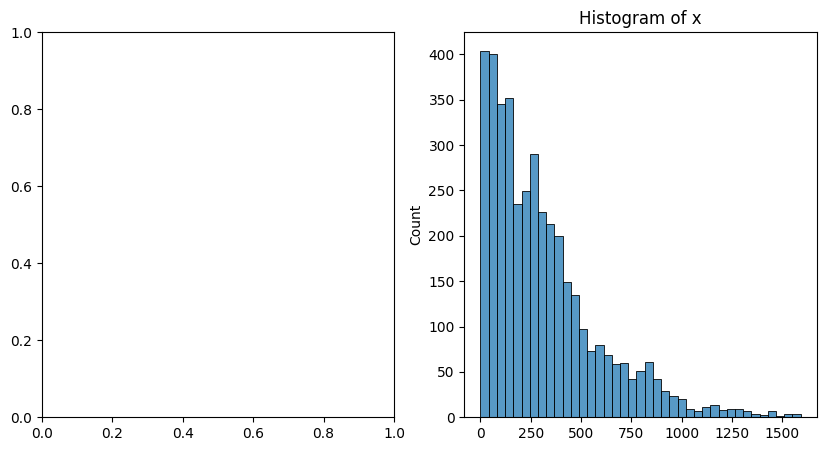

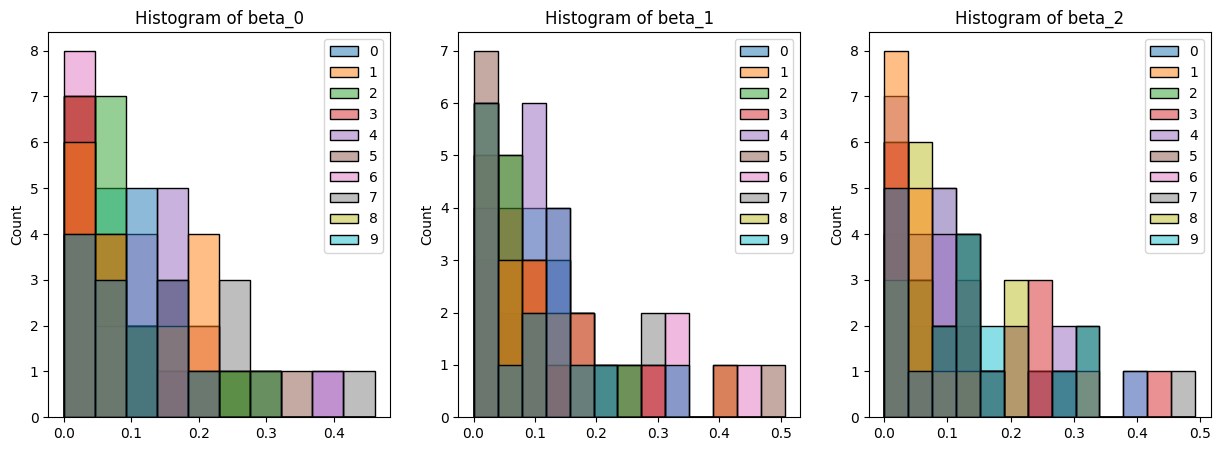

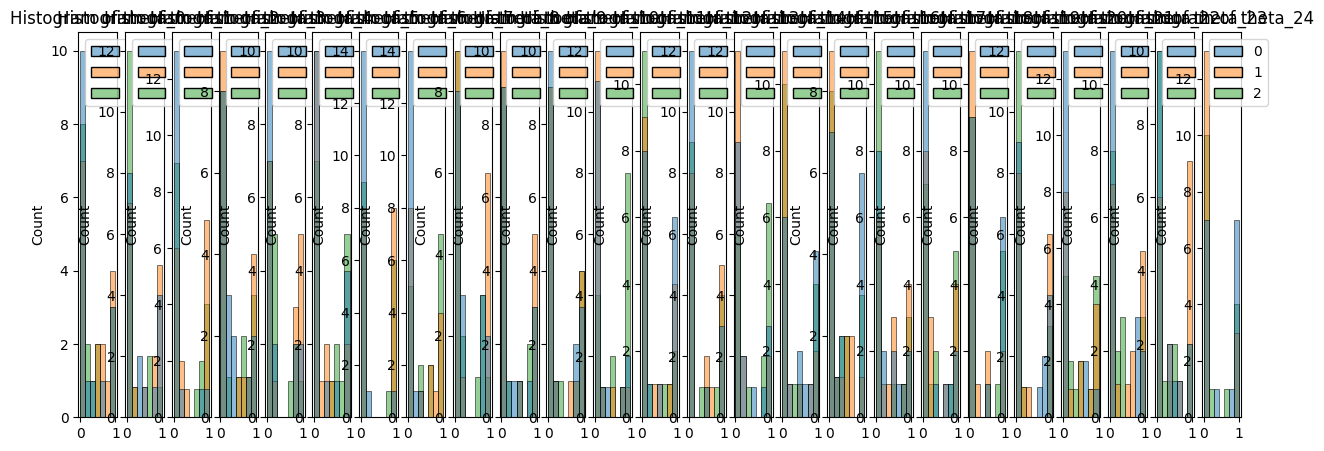

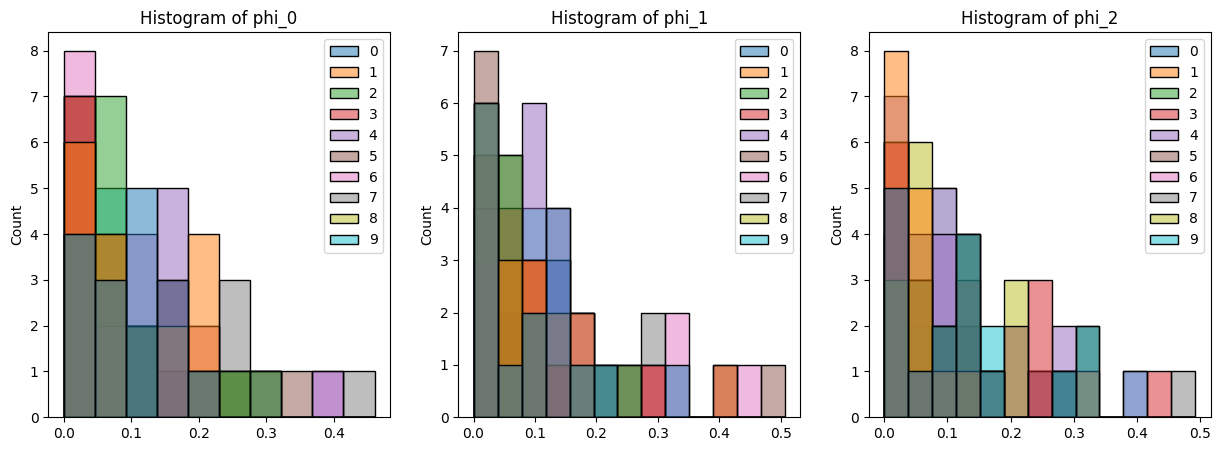

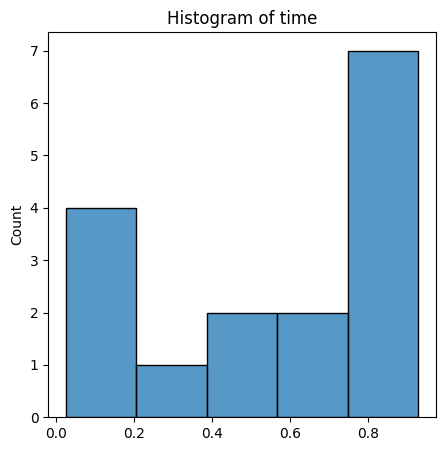

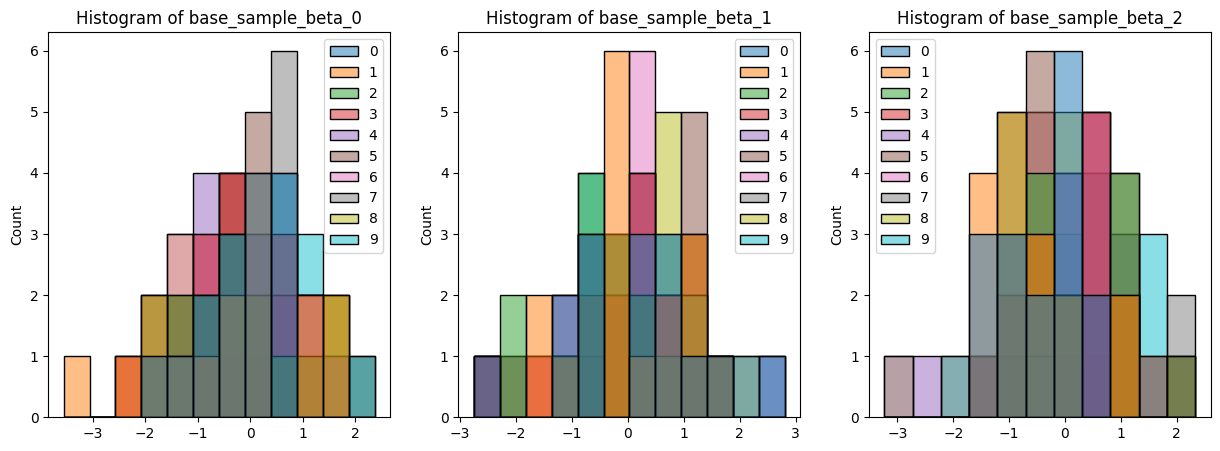

[{'X': {'mean': tensor(315.4869),
   'variance': tensor(79618.2656),
   'min': tensor(0.),
   'max': tensor(1531.),
   'mean_mean': tensor([277.1769, 338.5650, 362.8575, 290.2500, 330.3525, 308.6275, 366.6425,
           286.2075, 287.6725, 306.5175]),
   'variance_mean': tensor([44568.8359, 60323.6367, 76952.3125, 51799.9297, 61626.9648, 61099.9609,
           64550.3125, 19327.2500, 37444.9180, 43445.2031]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.1000),
   'variance': tensor(0.0098),
   'min': tensor(0.0002),
   'max': tensor(0.4780),
   'mean_mean': tensor([0.0889, 0.1042, 0.1206, 0.0872, 0.1041, 0.1001, 0.1138, 0.0912, 0.0938,
           0.0962]),
   'variance_mean': tensor([0.0094, 0.0119, 0.0172, 0.0097, 0.0113, 0.0123, 0.0125, 0.0042, 0.0077,
           0.0084]),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(312.9816),
   'variance': tensor(77053.6250),
   'min': tensor(0.),
   'max': tensor(1591.),
   'mean_mean': tensor([324

In [12]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 2,
    batch_size= BATCH_SIZE,
)


In [13]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 32
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 32 and 16 respectively


In [14]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['theta', 'phi', 'x', 'beta', 'time', 'base_sample_beta'])

In [15]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([8, 25, 10]), torch.Size([8, 3, 10]))

In [16]:
sample_batch["x"]

tensor([[[ 181.3843,  109.0000,  472.0000,  ...,  319.0000,  102.0000,
           258.0000],
         [ 495.3843,  544.0000,   45.0000,  ...,  126.0000,  555.0000,
           361.0000],
         [  86.3843,   16.0000,  442.0000,  ...,  277.0000,  114.0000,
           206.0000],
         ...,
         [ 488.3843,  534.0000,   48.0000,  ...,  149.0000,  555.0000,
           351.0000],
         [ 476.3843,  546.0000,   60.0000,  ...,  149.0000,  539.0000,
           331.0000],
         [ 486.3843,  556.0000,   51.0000,  ...,  144.0000,  536.0000,
           327.0000]],

        [[ 159.3843,  646.0000,   69.0000,  ...,  107.0000,   56.0000,
          1479.0000],
         [ 314.3843,  349.0000,  632.0000,  ...,  203.0000,  395.0000,
           522.0000],
         [ 320.3843,  360.0000,  647.0000,  ...,  182.0000,  384.0000,
           490.0000],
         ...,
         [ 199.3843,  568.0000,  163.0000,  ...,  166.0000,  135.0000,
          1220.0000],
         [ 318.3843,  390.0000,  602.000

In [17]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoderSequenceZ(
    n_input_features_encoder = P,
    n_input_features_decoder = P,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = True,
    use_self_attention_decoder = True,
    output_dim = P,

)

In [18]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [19]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [20]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0,
    

)

In [21]:
K, P

(3, 10)

In [22]:
trainer.validate()

100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
C:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\Training\TrainerCurriculumCNF.py:269: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  results[f"loss_{agg_name}"] = agg_fun(torch.stack(loss_lis)).item()


{'loss_mean': 0.7740018963813782,
 'loss_median': 0.7740018963813782,
 'loss_std': nan}

In [23]:
r = trainer.train()

Curriculum parameters: {'n_docs': 25, 'n_words': 10, 'n_topics': 3, 'batch_size': 8, 'alpha_dir': 0.1, 'beta_dir': 0.8, 'doc_len_max': 100, 'doc_len_mean': 10.0} at iteration 0


100%|██████████| 1/1 [00:00<00:00, 29.70it/s]
C:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\Training\TrainerCurriculumCNF.py:269: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  results[f"loss_{agg_name}"] = agg_fun(torch.stack(loss_lis)).item()
100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
C:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\Training\TrainerCurriculumCNF.py:269: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  results[f"loss_{agg_name}"] = agg_fun(torch.stack(loss_lis)).item()


Epoch 0:
Training: {'loss_mean': 1.012697458267212, 'loss_median': 0.9713065028190613, 'loss_std': 0.05853569135069847}
Validation: {'loss_mean': 1.0923564434051514, 'loss_median': 1.0923564434051514, 'loss_std': nan}
Validation curriculum: {'loss_mean': 1.1463621854782104, 'loss_median': 1.1463621854782104, 'loss_std': nan}
Time: 1.6690354347229004
Learning rate: [8.930474036597485e-05]


----------------------------------------------------------------------------------------------------
Saving model


100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

Test: {'loss_mean': 0.876092791557312, 'loss_median': 0.7944402694702148, 'loss_std': 0.1154741495847702}


In [24]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (K,P),
    n_samples=100,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 1,
    rtol = 1,
    #device = torch.device("cpu")
)




In [25]:
benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_lda_program(**benchmark_params_ppgrogram)

pprogram1_x = pprogram1


params for pprogram: {'n_docs': 25, 'n_words': 10, 'n_topics': 3, 'alpha_dir': 0.1, 'beta_dir': 0.8, 'doc_len_max': 100, 'doc_len_mean': 10.0}


In [26]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [27]:
x_test[0]

tensor([[4.5960e+02, 1.7100e+02, 2.6500e+02, 1.6000e+01, 2.2600e+02, 1.1500e+02,
         1.1900e+02, 7.7000e+01, 1.3830e+03, 2.8400e+02],
        [3.6160e+02, 3.9500e+02, 1.5100e+02, 7.7000e+01, 6.0700e+02, 5.3200e+02,
         2.5700e+02, 1.4900e+02, 2.4100e+02, 3.4500e+02],
        [4.1060e+02, 2.4400e+02, 2.4600e+02, 2.9000e+01, 3.0300e+02, 1.9400e+02,
         1.4100e+02, 8.7000e+01, 1.1870e+03, 2.7400e+02],
        [6.9460e+02, 3.4200e+02, 5.0000e+00, 1.8000e+01, 5.8200e+02, 3.2500e+02,
         8.7000e+01, 4.7800e+02, 5.1100e+02, 7.3000e+01],
        [3.6860e+02, 3.4600e+02, 1.3500e+02, 8.3000e+01, 6.0000e+02, 4.6500e+02,
         3.3500e+02, 1.5900e+02, 2.7100e+02, 3.5300e+02],
        [4.8660e+02, 1.6100e+02, 2.9800e+02, 2.0000e+00, 1.3600e+02, 2.4000e+01,
         6.9000e+01, 5.4000e+01, 1.6280e+03, 2.5700e+02],
        [6.5660e+02, 2.8400e+02, 9.2000e+01, 1.1000e+01, 4.5700e+02, 2.0700e+02,
         7.2000e+01, 3.3800e+02, 8.6000e+02, 1.3800e+02],
        [4.6260e+02, 1.3600

In [28]:
x_test[1]

tensor([[1.5660e+02, 3.2500e+02, 5.0400e+02, 9.0000e+01, 4.6000e+01, 2.7900e+02,
         4.6100e+02, 4.8300e+02, 1.8300e+02, 5.8800e+02],
        [1.6021e+00, 8.5000e+01, 4.4700e+02, 3.9000e+01, 1.2000e+01, 2.5000e+01,
         8.2000e+01, 1.1000e+03, 6.1500e+02, 7.0900e+02],
        [6.0205e-01, 9.4000e+01, 4.6500e+02, 4.2000e+01, 1.9000e+01, 1.8000e+01,
         7.1000e+01, 1.0630e+03, 6.5800e+02, 6.8500e+02],
        [1.6960e+02, 2.9100e+02, 4.8700e+02, 1.4500e+02, 4.2000e+01, 2.8500e+02,
         4.9800e+02, 3.5900e+02, 9.6000e+01, 7.4300e+02],
        [1.1260e+02, 2.1000e+02, 5.4100e+02, 8.4000e+01, 3.7000e+01, 1.9200e+02,
         3.2900e+02, 6.6000e+02, 3.2900e+02, 6.2100e+02],
        [2.2960e+02, 1.2500e+02, 3.2100e+02, 2.3900e+02, 7.2000e+01, 2.0900e+02,
         5.9200e+02, 1.7200e+02, 6.1000e+01, 1.0950e+03],
        [1.1460e+02, 2.2400e+02, 5.4000e+02, 9.5000e+01, 2.1000e+01, 1.8100e+02,
         3.3400e+02, 6.5400e+02, 3.1300e+02, 6.3900e+02],
        [1.8860e+02, 3.2300

In [29]:
x_test.shape

torch.Size([3, 25, 10])

In [30]:
#samples = full_model.sample_posterior(x_test[0])

In [31]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_x,
    n_samples=1000,
    n_warmup=500
)

models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 500)

In [32]:
"""
evaluation = Evaluate(
    posterior_model = models[1],
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)
"""

evaluation = Evaluate(
    posterior_model = hmc,
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_posterior_model = result_dict_to_latent_variable_convert_phi_to_beta_flatten,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_phi_to_beta_flatten,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [33]:
#full_model_samples = evaluation.sample_posterior_model(full_model)
#full_model_samples[1]["x"].shape

In [34]:
evaluation.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]C:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\LatentFactorModels\ComparisonModels\Hamiltionian_MC_Numpyro.py:65: FutureWarning: Some algorithms will automatically enumerate the discrete latent site doc_len of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  self.mcmc.run(rng_key=self.sample_key, x=x)
Sampling posterior:  50%|█████     | 1/2 [01:16<01:16, 76.22s/it]C:\Users\arik_\Documents\Dokumente\Job_Clausthal\PFNs\Repository\PFNExperiments\LatentFactorModels\ComparisonModels\Hamiltionian_MC_Numpyro.py:65: FutureWarning: Some algorithms will automatically enumerate the discrete latent site doc_len of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  self.mcmc.run(rng_key=self.sample_key, x=x)


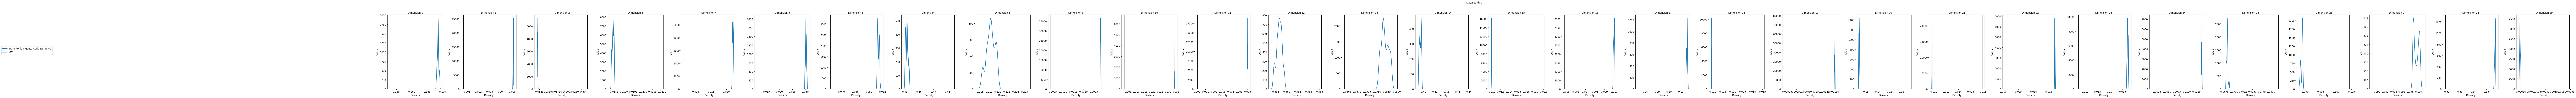

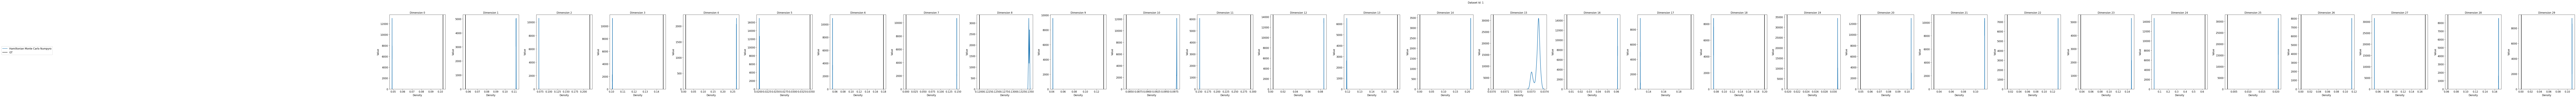

In [85]:
evaluation.plot_results()

In [86]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [87]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [88]:
comparison_models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [89]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = comparison_models[1:3],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [90]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]


RuntimeError: AutoDiagonalNormal found no latent variables; Use an empty guide instead
Trace Shapes:
 Param Sites:
Sample Sites:
Trace Shapes:
 Param Sites:
Sample Sites: